In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
from  scipy import stats
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


C:\Users\11950\AppData\Local\Temp\ipykernel_4576\3941181828.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


1.Predict whether a patient has chronic kidney disease (ckd) based on various diagnostic data.

2.

In [6]:
kidney = pd.read_csv("C:/Users/11950/Documents/WeChat Files/wxid_wlqibj5b23m512/FileStorage/File/2024-04/kidney_disease.csv")
kidney = kidney.drop('id', axis= 1)
kidney.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [7]:
kidney.dtypes

age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc                object
pc                 object
pcc                object
ba                 object
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv                object
wc                 object
rc                 object
htn                object
dm                 object
cad                object
appet              object
pe                 object
ane                object
classification     object
dtype: object

In [8]:
f_c = kidney.select_dtypes(include=['float64']).columns
o_c = kidney.select_dtypes(include=['object']).columns

In [9]:
mapping ={
    'rbc' : {'normal': 1, 'abnormal': 0},
    'pc' : {'normal': 1, 'abnormal': 0},
    'pcc' : {'present': 1, 'notpresent': 0},
    'ba' : {'present': 1, 'notpresent': 0},
    'htn' : {'yes': 1, 'no': 0},
    'dm' : {'yes': 1, 'no': 0},
    'cad' : {'yes': 1, 'no': 0},
    'appet' : {'good': 1, 'poor': 0},
    'pe' : {'yes': 1, 'no': 0},
    'ane' : {'yes': 1, 'no': 0},
}

In [10]:
for column, mapping in mapping.items():
    kidney[column] = kidney[column].replace(mapping)

C:\Users\11950\AppData\Local\Temp\ipykernel_4576\1418916581.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  kidney[column] = kidney[column].replace(mapping)


In [11]:
kidney

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,NaN,1.0,0.0,0.0,121.0,...,44,7800,5.2,1.0,1,0,1.0,0.0,0.0,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,1.0,0.0,0.0,NaN,...,38,6000,NaN,0.0,0,0,1.0,0.0,0.0,ckd
2,62.0,80.0,1.010,2.0,3.0,1.0,1.0,0.0,0.0,423.0,...,31,7500,NaN,0.0,1,0,0.0,0.0,1.0,ckd
3,48.0,70.0,1.005,4.0,0.0,1.0,0.0,1.0,0.0,117.0,...,32,6700,3.9,1.0,0,0,0.0,1.0,1.0,ckd
4,51.0,80.0,1.010,2.0,0.0,1.0,1.0,0.0,0.0,106.0,...,35,7300,4.6,0.0,0,0,1.0,0.0,0.0,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,1.0,1.0,0.0,0.0,140.0,...,47,6700,4.9,0.0,0,0,1.0,0.0,0.0,notckd
396,42.0,70.0,1.025,0.0,0.0,1.0,1.0,0.0,0.0,75.0,...,54,7800,6.2,0.0,0,0,1.0,0.0,0.0,notckd
397,12.0,80.0,1.020,0.0,0.0,1.0,1.0,0.0,0.0,100.0,...,49,6600,5.4,0.0,0,0,1.0,0.0,0.0,notckd
398,17.0,60.0,1.025,0.0,0.0,1.0,1.0,0.0,0.0,114.0,...,51,7200,5.9,0.0,0,0,1.0,0.0,0.0,notckd


3.

In [12]:
kidney.describe()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,htn,appet,pe,ane
count,391.000000,388.000000,353.000000,354.000000,351.000000,248.000000,335.000000,396.000000,396.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000,398.000000,399.000000,399.000000,399.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,0.810484,0.773134,0.106061,0.055556,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437,0.369347,0.794486,0.190476,0.150376
std,17.169714,13.683637,0.005717,1.352679,1.099191,0.392711,0.419431,0.308305,0.229351,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587,0.483235,0.404584,0.393170,0.357888
min,2.000000,50.000000,1.005000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000,0.000000,0.000000,0.000000,0.000000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000,0.000000,1.000000,0.000000,0.000000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000,0.000000,1.000000,0.000000,0.000000
75%,64.500000,80.000000,1.020000,2.000000,0.000000,1.000000,1.000000,0.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000,1.000000,1.000000,0.000000,0.000000
max,90.000000,180.000000,1.025000,5.000000,5.000000,1.000000,1.000000,1.000000,1.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000,1.000000,1.000000,1.000000,1.000000


1)Numerical variables include age, bp, sg, al, su, bgr,bu, sc, sod, pot, hemo. 2) Categorical variables include rbc, pc, pcc, ba, htn, dm, cad, appet, pe, ane, classification, those variables are mostly binary. 3) The age of patients ranges from 2 to 90 years with a mean of approximately 51.5 years. 4) bp mainly center around 70 to 80 mmHg.

4.

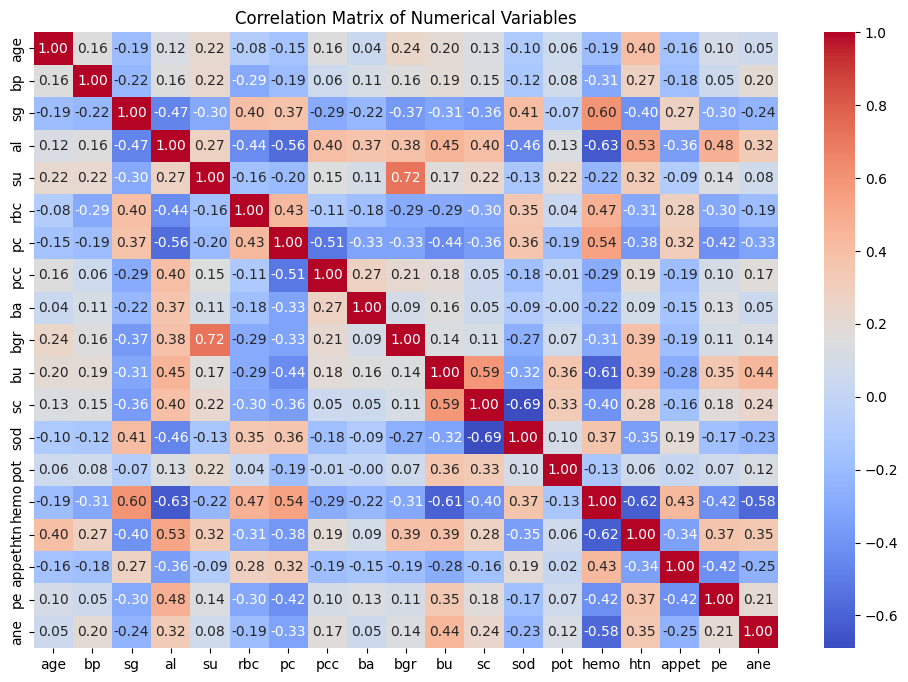

In [13]:

correlation_matrix = kidney.select_dtypes(include=[np.number]).corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix of Numerical Variables')
plt.show()


1)su and bgr show a strong positive correlation (0.72), we might consider using only one in a predictive model to reduce the complexity. 2) sg has a moderate negative correlation with al, bgr, bu and htn, which means that sg is a key feature that reflects multiple aspects of kidney function and should be included in the model. 3) sc and sod show a strong negative correlation (-0.69), we might consider keep them for the model.

5.

In [14]:
missing_v = kidney.isnull().sum()
missing_v

age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [15]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
for column in kidney.select_dtypes(include=['object']).columns:
    kidney[column] = label_encoder.fit_transform(kidney[column].astype(str))


In [20]:
m = kidney.median()
kidney.fillna(m, inplace=True)
print(kidney.isnull().sum())
kidney

age               0
bp                0
sg                0
al                0
su                0
rbc               0
pc                0
pcc               0
ba                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
wc                0
rc                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64


,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,1.0,1.0,0.0,0.0,121.0,...,32,72,34,1.0,4,1,1.0,0.0,0.0,0
1,7.0,50.0,1.020,4.0,0.0,1.0,1.0,0.0,0.0,121.0,...,26,56,49,0.0,3,1,1.0,0.0,0.0,0
2,62.0,80.0,1.010,2.0,3.0,1.0,1.0,0.0,0.0,423.0,...,19,70,49,0.0,4,1,0.0,0.0,1.0,0
3,48.0,70.0,1.005,4.0,0.0,1.0,0.0,1.0,0.0,117.0,...,20,62,19,1.0,3,1,0.0,1.0,1.0,0
4,51.0,80.0,1.010,2.0,0.0,1.0,1.0,0.0,0.0,106.0,...,23,68,27,0.0,3,1,1.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,1.0,1.0,0.0,0.0,140.0,...,35,62,30,0.0,3,1,1.0,0.0,0.0,2
396,42.0,70.0,1.025,0.0,0.0,1.0,1.0,0.0,0.0,75.0,...,42,72,44,0.0,3,1,1.0,0.0,0.0,2
397,12.0,80.0,1.020,0.0,0.0,1.0,1.0,0.0,0.0,100.0,...,37,61,36,0.0,3,1,1.0,0.0,0.0,2
398,17.0,60.0,1.025,0.0,0.0,1.0,1.0,0.0,0.0,114.0,...,39,67,41,0.0,3,1,1.0,0.0,0.0,2
